In [3]:
# data manipulation imports
import numpy as np
import pandas as pd

# data saving imports
import pickle
import os

# custom imports
from regression_class import RedditRegression as rr
from regression_class import TimestampClass

In [4]:
data = pickle.load(open('test_data_crypto_5_days.p', 'rb'))

In [5]:
regression_threads = data['regression_data']
all_data = data['all_data']

In [6]:
# params
X_COLS = [
    'sentiment_sign', 'sentiment_magnitude', 'hour', 'num_dayofweek','activity_ratio',
    'mean_author_sentiment_sign', 'mean_author_sentiment_magnitude', 'log_author_all_activity_count',
    ]
y_col = 'success'

# regression params dict
regression_params = {
    'name': 'crypto',
    'regression_data': regression_threads,
    'thread_data': all_data,
    'collection_window': 2,
    'model_window': 2,
    'validation_window': 1,
    'regression_type': 'logistic',
    'FSS': True,
    'performance_scoring_method': 'roc_auc',
    'x_cols': X_COLS,
    'y_col': y_col,
    'metrics': ["roc_auc"],
    'activity_threshold': 2,
}

In [7]:
test_logreg = rr(regression_params)

In [8]:
test_logreg.main()

Running FSS


c:\Users\snuzz\anaconda3\envs\redditenv\lib\site-packages\numpy\core\_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\snuzz\anaconda3\envs\redditenv\lib\site-packages\numpy\core\_methods.py:261: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
c:\Users\snuzz\anaconda3\envs\redditenv\lib\site-packages\numpy\core\_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\snuzz\anaconda3\envs\redditenv\lib\site-packages\numpy\core\_methods.py:261: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Model 1
Optimization terminated successfully.
         Current function value: 0.510612
         Iterations 5
Model 2
Optimization terminated successfully.
         Current function value: 0.508381
         Iterations 5
Model 3
Optimization terminated successfully.
         Current function value: 0.505640
         Iterations 5
Model 4
Optimization terminated successfully.
         Current function value: 0.504706
         Iterations 6
Model 5
Optimization terminated successfully.
         Current function value: 0.504415
         Iterations 6
Model 6
Optimization terminated successfully.
         Current function value: 0.504383
         Iterations 6
Model 7
Optimization terminated successfully.
         Current function value: 0.504229
         Iterations 6
Model 8
Optimization terminated successfully.
         Current function value: 0.502495
         Iterations 6


In [9]:
test_logreg.regression_metrics["metrics"]

,num_features,model,auc,validation_auc
1,1,success ~ hour,0.556135,0.514238
2,2,success ~ hour + mean_author_sentiment_sign,0.572123,0.528476
3,3,success ~ hour + num_dayofweek + mean_author_s...,0.592365,0.529238
4,4,success ~ hour + num_dayofweek + mean_author_s...,0.601657,0.543524
5,5,success ~ hour + num_dayofweek + mean_author_s...,0.603068,0.580476
6,6,success ~ sentiment_magnitude + hour + num_day...,0.603202,0.580095
7,7,success ~ sentiment_sign + sentiment_magnitude...,0.599172,0.580952
8,8,success ~ sentiment_sign + sentiment_magnitude...,0.591917,0.524476


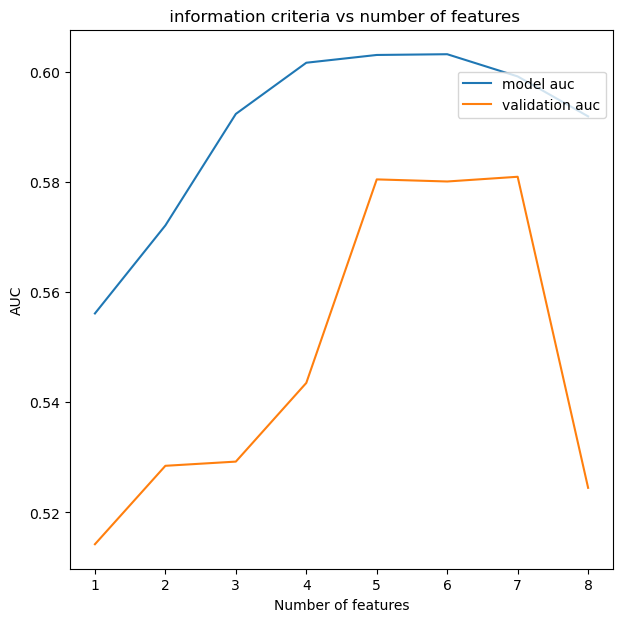

In [13]:
test_logreg.plot_metrics_vs_features(['auc', 'validation_auc'], ylabel='AUC', labels = ['model auc', 'validation auc'])

In [15]:
test_logreg.params_dict_to_df(test_logreg.regression_params)

,input
param,
validation_window,1
name,crypto
FSS,True
performance_scoring_method,roc_auc
x_cols,"[sentiment_sign, sentiment_magnitude, hour, nu..."
y_col,success
metrics,[roc_auc]
regression_type,logistic
collection_window,2


In [16]:
test_logreg.regression_metrics['regression_params']

{1:               param    stderr    pvalue
 Intercept  0.926422  0.288138  0.001304
 hour       0.032407  0.021473  0.131256,
 2:                                param    stderr    pvalue
 Intercept                   0.884194  0.289916  0.002290
 hour                        0.031137  0.021502  0.147588
 mean_author_sentiment_sign  0.176057  0.136408  0.196819,
 3:                                param    stderr    pvalue
 Intercept                   1.100288  0.331452  0.000901
 hour                        0.029940  0.021620  0.166109
 num_dayofweek              -0.369637  0.262185  0.158589
 mean_author_sentiment_sign  0.184301  0.137048  0.178693,
 4:                                     param    stderr    pvalue
 Intercept                        1.221175  0.363138  0.000771
 hour                             0.030270  0.021618  0.161439
 num_dayofweek                   -0.385281  0.263245  0.143307
 mean_author_sentiment_sign       0.201677  0.138632  0.145734
 mean_author_sentiment_ma